# Incidenti aerei

Il dataset riporta gli incidenti aerei avvenuti dagli anni `1908` fino al `2009` riportando vari campi come: l'operatore che ha effettuato il volo, la data e l'ora del volo, il numero identificativo del volo e altri campi. <br>
Osserviamo ora i valori dei campi della tabella sottostante.

In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

Data = pd.read_csv('./archive/Airplane_Crashes_and_Fatalities_Since_1908.csv')

np.random.seed(1) 
obs, feat = Data.shape
Data.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
717,06/29/1945,NaN,"Bangalore, India",Military - Royal Indian Air Force,NaN,NaN,NaN,NaN,NaN,2.0,2.0,36.0,Crashed into a village exploding and destoying...
2857,11/25/1975,18:50,"Near Bir Lahfan, Egypt",Military - Israel Air Force,NaN,NaN,Lockheed C-130 Hercules,011,NaN,20.0,20.0,0.0,Crashed 15 ft. below the summit of cloud-obscu...
5032,01/27/2005,08:10,"Lasi, Hungary",Farnair Hungary,NaN,Bucharest -Lasi,Let 410UVP-E4,HA-LAR,871923,2.0,2.0,0.0,The cargo plane was attempting to land in a sn...
2181,12/25/1967,13:49,"Chiang Mai, Thailand",Thai Airways,002,Bangkok - Chiang Mai,Douglas DC-3,HS-TDH,9189,31.0,4.0,0.0,"During poor weather and after a flyby, the pil..."
4359,09/02/1995,NaN,"Toronto, Ontario, Canada",Military - Royal Air Force,NaN,Air Show,British Aerospace Nimrod MR-2P,XV239,8014,7.0,7.0,0.0,"During a low flying turn manuve, at an air sho..."


In [35]:
print(str("Il dataset consiste in " + str(obs) + " osservazioni (schianti) e " + str(feat) + " colonne. Le colonne sono le seguenti:"))

Il dataset consiste in 5268 osservazioni (schianti) e 13 colonne. Le colonne sono le seguenti:


- **Date** (Data dell'incidente)
- **Time** (Ora dell'incidente)
- **Location** (Luogo dell'incidente)
- **Operator** (Operatore del volo)
- **Flight #** (Numero del volo)
- **Route** (Tratta del volo)
- **Type** (Tipo di aereo)
- **Registration** (Numero dell'aereo)
- **cn/In** (?)
- **Aboard** (Persone totali a bordo dell'aereo)
- **Fatalities** (Persone morte nell'incidente)
- **Ground** (Non ha senso dato che dovrebbe essere Aboard = Fatalities + Ground ma guardando i dati non è così)
- **Summary** (Breve riassunto della dinamica dell'incidente)

In [36]:
#cleaning up by replacing the old incorrect value time with the new one
Data['Time'] = Data['Time'].replace(np.nan, '00:00') 
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '14:20')

Data['Time'] = Data['Date'] + ' ' + Data['Time']
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
Data['Time'] = Data['Time'].apply(todate)

#print('Range di date a partire da ' + str(Data.Time.min()) + ' fino a ' + str(Data.Time.max()))
Data.Operator = Data.Operator.str.upper()

Una volta finito di ripulire i dati, vogliamo visualizzare il numero di incidenti aerei per ogni anno, partendo dal primo anno disponibile fino ad arrivare all'ultimo.

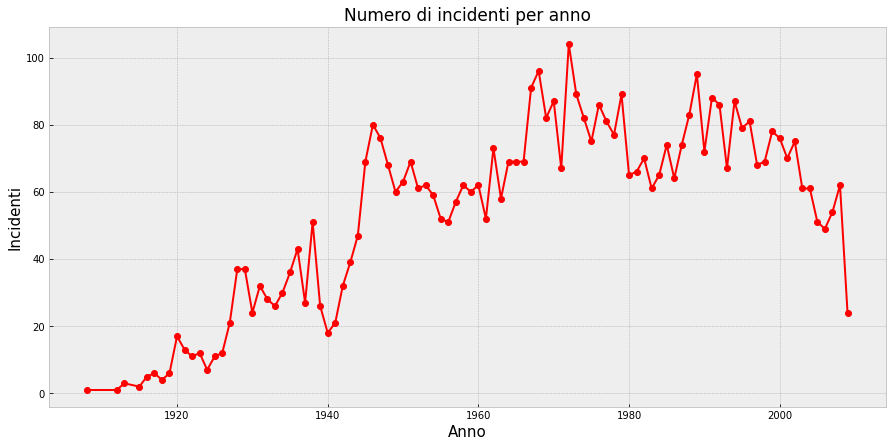

In [37]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count()
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(15,7))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='red', marker = "o", linewidth=2)
plt.xlabel('Anno', fontsize=15)
plt.ylabel('Incidenti', fontsize=15)
plt.title('Numero di incidenti per anno', loc='Center', fontsize=17)
plt.show()

Come possiamo notare dal grafico, a partire dal `2002`, c'è stata una riduzione progressiva del numero di incidenti per 4 anni, per poi veder risalire il numero di incidenti nei due anni successivi e per finire, un drastico calo nell'ultimo anno. <br>
L'anno con il numero di incidenti più alto, con un valore superiore a **100**, è il `1972`, mentre quello con il numero più basso,con un valore pari a **1**, è il `1908` o il `1912`.

### Distinzione dei voli

In [38]:
Temp = Data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = Data.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']] # dataframe with Index Time Military Passenger
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero) # group by years omitting the null (false) count

Osserviamo che il dataset è diviso **per tipo di volo**: i *voli di linea* e i *voli militari*. <br>
Ora proviamo a vedere i due grafici: il primo riguardante il numero di incidenti mentre il secondo gli anni in cui si sono verificati.

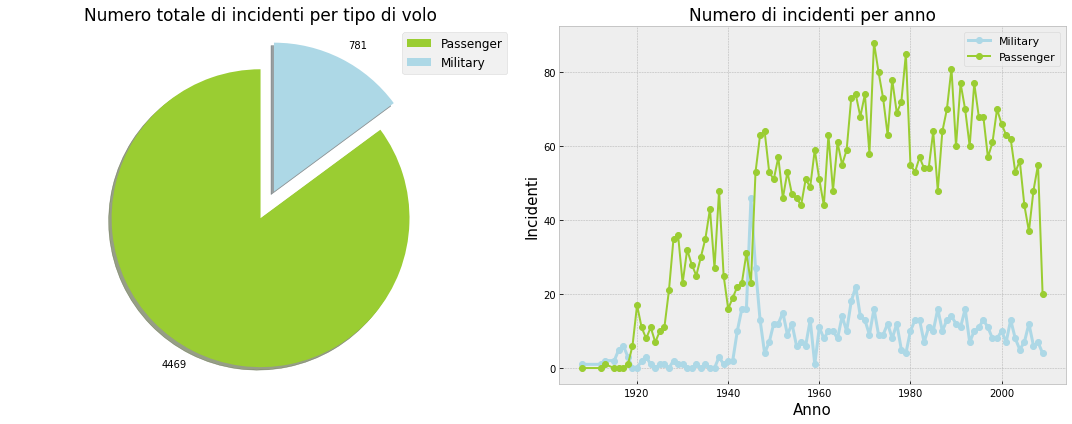

In [39]:
colors = ['yellowgreen', 'lightblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90, shadow = True, explode={0.2, 0.0})
plt.legend(patches, Temp.index, loc="best", fontsize=12)
plt.axis('equal')
plt.title('Numero totale di incidenti per tipo di volo', loc='Center', fontsize=17)

plt.subplot(1, 2, 2)
plt.style.use('bmh')
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightblue', marker = "o", linewidth=3)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = "o", linewidth=2)
plt.legend(fontsize=11)
plt.xlabel('Anno', fontsize=15)
plt.ylabel('Incidenti', fontsize=15)
plt.title('Numero di incidenti per anno', loc='Center', fontsize=17)
plt.tight_layout()
plt.show()

In [40]:
Fatalities = Data.groupby(Data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

Come si può notare, il numero di incidenti dei voli militari è nettamente minore rispetto al numero di incidenti dei voli di linea. <br>
Ora che abbiamo fatto la distinzione sul tipo di volo, proviamo a vedere quant'è la **percentuale dei morti** negli incidenti aerei, divisi per anno e per tipo di volo.

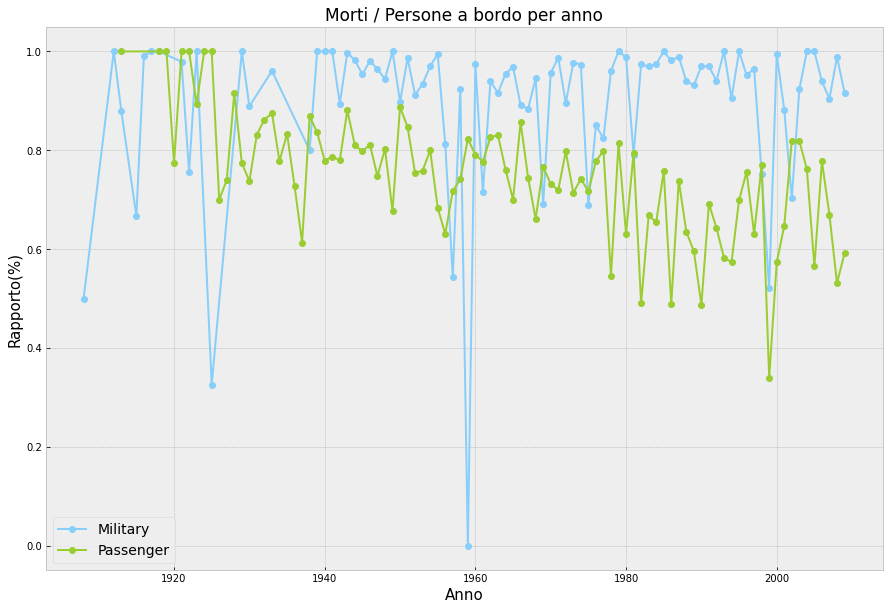

In [41]:
Temp2 = Data.copy()

Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger', 'Aboard', 'Fatalities']]
Temp2 = Temp2.groupby([Temp2.Time.dt.year,'Military', 'Passenger']).sum()[["Aboard", 'Fatalities']]

Temp2["Proportion"] = Temp2[["Fatalities"]]["Fatalities"] / Temp2[["Aboard"]]["Aboard"]

plt.figure(figsize=(15,10))
plt.style.use('bmh')
plt.plot(Temp2.loc[Temp2.index.get_level_values(1)].index.get_level_values(0), "Proportion", data=Temp2.loc[Temp2.index.get_level_values(1)], color='lightskyblue', marker = "o", linewidth=2)
plt.plot(Temp2.loc[Temp2.index.get_level_values(2)].index.get_level_values(0), "Proportion", data=Temp2.loc[Temp2.index.get_level_values(2)], color = 'yellowgreen', marker = "o", linewidth=2)
plt.legend(["Military", "Passenger"], fontsize=14)
plt.xlabel('Anno', fontsize=15)
plt.ylabel('Rapporto(%)', fontsize=15)
plt.title('Morti / Persone a bordo per anno', loc='Center', fontsize=17)
plt.show()

Si può osservare che il rapporto tra i morti e i passeggeri a bordo divisi per anno, è tendente all'`90%` (cioè al fatto che quasi tutti i passeggeri sono morti) per i voli militari, mentre per i voli di linea il rapporto è più tendente al `70%`. <br>
Bisogna notare inoltre che per i voli di linea, più il tempo avanza e più il rapporto della mortalità diminuisce.

Ora proviamo a visualizzare il numero totali di incidenti delle prime 20 compagnie aeree.

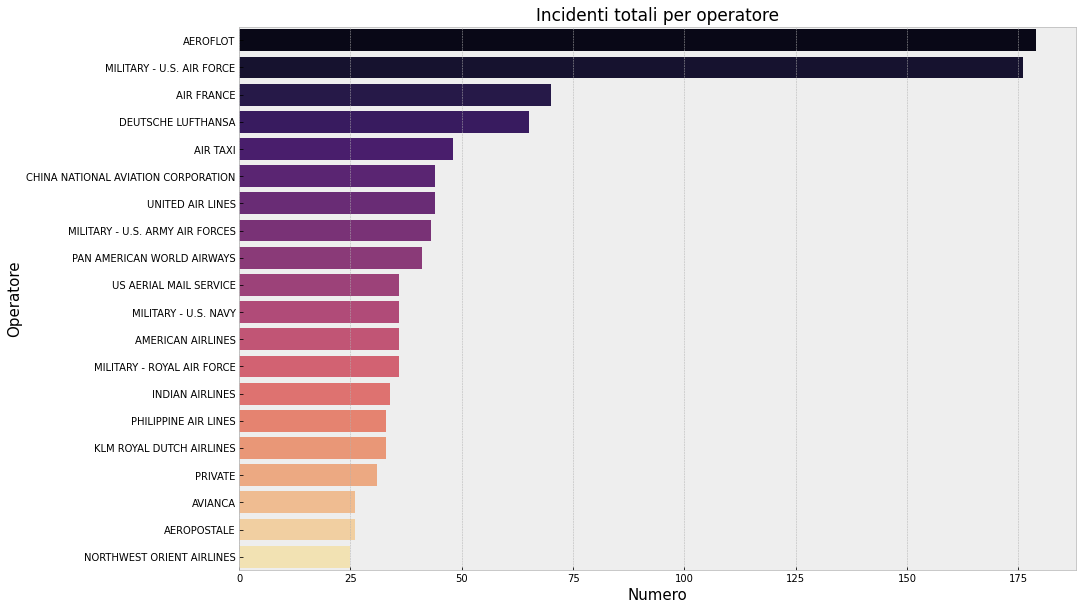

In [42]:
Temp = Data.groupby("Operator")[["Operator"]].count()
Temp = Temp.rename(columns={"Operator" : "Number"})
Temp = Temp.sort_values(by="Number", ascending=False).head(20)

plt.figure(figsize=(15,10))
plt.style.use("bmh")
sns.barplot(x=Temp["Number"], y=Temp.index, palette="magma")
plt.xlabel('Numero', fontsize=15)
plt.ylabel('Operatore', fontsize=15)
plt.title('Incidenti totali per operatore', loc='Center', fontsize=17)
plt.show()

Come possiamo dedurre dal grafico, il numero più alto di incidenti è detenuto dalla compagnia aerea russa `AEROFLOT`  con un totale di 175 incidenti circa, al secondo posto si ha l'esercito americano mentre al terzo la compagnia aerea francese `AIR FRANCE`.

Andiamo ora ad esamire la terza compagnia aerea per vedere la sua distribuzione di incidenti negli anni.

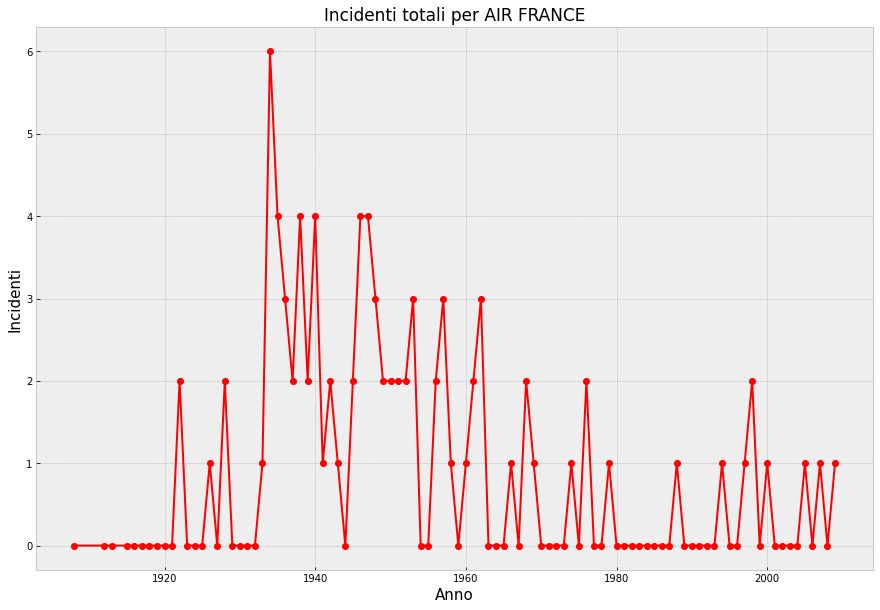

In [61]:
Temp = Data.copy()
Temp["France"] = Data.Operator.str.contains("AIR FRANCE")
Temp = Temp.loc[:, ['Time', 'France']]
Temp = Temp.groupby(Temp.Time.dt.year)[['France']].aggregate(np.count_nonzero) # group by years omitting the null (false) count

plt.figure(figsize=(15,10))
plt.style.use("bmh")
plt.plot(Temp.index,"France", data=Temp, color='red', marker = "o", linewidth=2)
plt.xlabel('Anno', fontsize=15)
plt.ylabel('Incidenti', fontsize=15)
plt.title('Incidenti totali per AIR FRANCE', loc='Center', fontsize=17)
plt.show()

Il picco è stato raggiunto nel `1934`, con ben 6 incidenti.

## Manca qualcosa?

Pensiamo al fatto che il numero di incidenti nel `1908` siano minori rispetto al `2009`, è possibile che in `100 anni` le tecnologie non siano progredite secondo quanto affermato dai dati? <br>
Manca una componente fondamentale, non abbiamo tenuto conto del numero di voli che sono stati effettuati negli anni, è chiaro che nel `1908` ci siano stati molti meno voli rispetto al `2009`, e quindi i grafici non mostrano la proporzione corretta sul numero totale dei voli per anno.<br>
Per rimediare importiamo due nuovi dataset: il primo contenente il numero totale di passeggeri divisi per anno, il secondo il numero totale di voli anch'essi divisi per anno.

In [23]:
Passengers = pd.read_csv('./archive/API_IS.AIR.PSGR_DS2_en_csv_v2.csv')
Passengers.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
6,Andorra,AND,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Equatorial Guinea,GNQ,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,401712.0,303024.0,400758.0,458222.0,496322.0,4.043013e+05,425475.0,138898.0,NaN,NaN
34,Central African Republic,CAF,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,Israel,ISR,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,5565864.0,5886728.0,6331198.0,6866472.0,6993888.0,7.404373e+06,7068458.0,1249361.0,NaN,NaN
29,Brazil,BRA,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,95591641.0,100403628.0,102039359.0,94142377.0,96395709.0,1.021100e+08,102917546.0,45405756.0,NaN,NaN


In [24]:
Departures = pd.read_csv('./archive/API_IS.AIR.DPRT_DS2_en_csv_v2.csv')
Departures.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
86,"Gambia, The",GMB,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,1788.0,1848.000000,35.0,440.0,625.000,1116.00000,1136.0,NaN,NaN,NaN
238,Middle East & North Africa (IDA & IBRD countries),TMN,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,556102.5,571311.141616,510478.0,556552.0,624693.468,636327.75353,637401.0,280103.94200,NaN,NaN
66,Ecuador,ECU,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,58687.0,61248.000000,61649.0,55430.0,50837.000,53033.00000,50575.0,12056.18000,NaN,NaN
42,Cameroon,CMR,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,5640.0,5640.000000,5499.0,8212.0,5640.000,5550.00000,2336.0,1169.00000,NaN,NaN
136,Low income,LIC,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,209546.0,208291.310290,181611.0,186418.0,208832.000,200417.75353,204534.3,113880.75965,NaN,NaN


Come possiamo notare dalle tabelle, molti campi sono riempi con Nan value; per poter visualizzare i grafici, abbiamo bisogno di sostituirli con il valore `0`.

In [25]:
del Passengers['Unnamed: 66']
del Passengers['2021']
del Departures['Unnamed: 66']
del Departures['2021']

In [26]:
Departures = Departures.replace(np.nan, 0)
Passengers = Passengers.replace(np.nan, 0)

Dp = Departures.copy();
Pg = Passengers.copy();

In [27]:
Pg = Pg.drop(["Country Name", "Country Code", "Indicator Name", "Indicator Code"], axis = 1)
Pg = pd.DataFrame(Pg.sum())
Pg = Pg.drop(Pg.index[0:10]) #Remove the first 9 years that have value = 0
Pg = Pg['1970':'2020']
Pg.columns = ['Sum']
Pg.index.name = 'Year'

Come si evince dalla tabella, siccome i primi `10` anni hanno sempre valore pari a `0`, questi vengono omessi dalla visualizzazione.

Guardiamo adesso il numero totale di passeggeri divisi per anno.

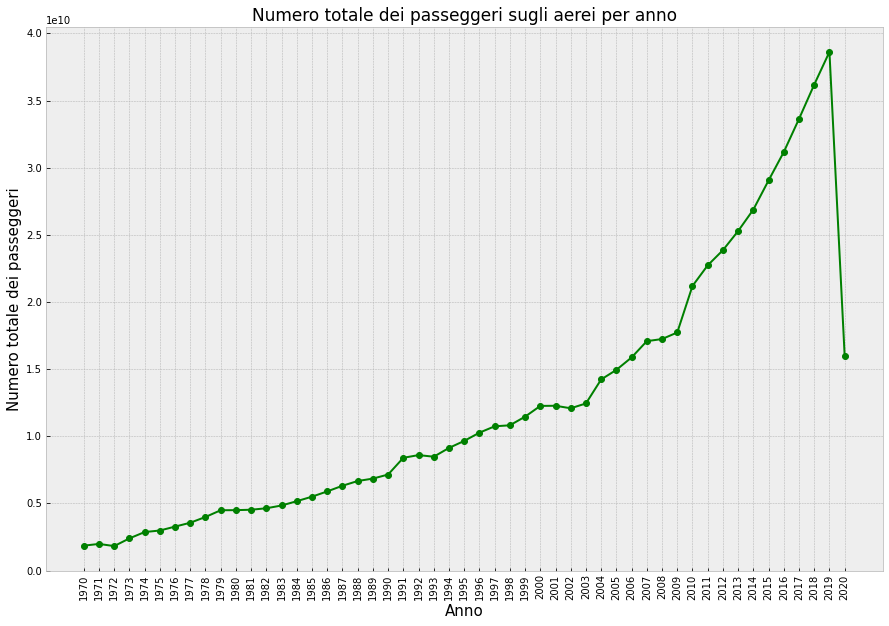

In [28]:
plt.figure(figsize=(15,10))

plt.style.use('bmh')
plt.plot(Pg.index, 'Sum', data=Pg, marker = "o", color = 'green', linewidth=2)
plt.xlabel('Anno', fontsize=15)
plt.ylabel('Numero totale dei passeggeri', fontsize=15)
plt.title('Numero totale dei passeggeri sugli aerei per anno', loc='Center', fontsize=17)
plt.xticks(rotation=90)
plt.show()

Come si può notare, il numero di passeggeri negli ultimi anni è cresciuto esponenzialmente rispetto ai primi anni.<br>
Possiamo inoltre vedere che nell'ultimo anno, il numero dei passeggeri è drasticamente calato rispetto all'anno precedente, questo è dovuto al fatto che in quel periodo c'è stata la pandemia che ha colpito in maniera molto dura il settore del trasporto aereo. <br>
Purtroppo il dataset non mostra nessun valore per il `2021`, quindi non si può vedere se c'è stato un incremento o un decremento sul numero di passeggeri.

In [29]:
Dp = Dp.drop(["Country Name", "Country Code", "Indicator Name", "Indicator Code"], axis = 1)
Dp = pd.DataFrame(Dp.sum())
Dp = Dp.drop(Dp.index[0:10]) #Toglie i primi 9 anni che hanno valore pari a 0
Dp = Dp['1970':'2020']
Dp.columns = ['Sum']
Dp.index.name = 'Year'

Ora proviamo a vedere anche il grafico del numero totale dei voli effettuati divisi per anno.

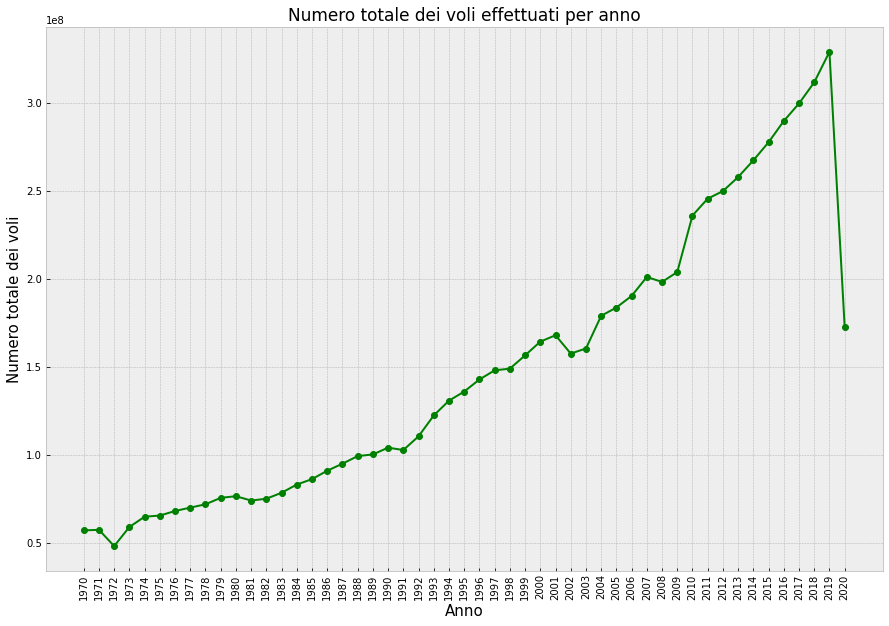

In [30]:
plt.figure(figsize=(15,10))

plt.style.use('bmh')
plt.plot(Dp.index, 'Sum', data=Dp, marker = "o", color = 'green', linewidth=2)
plt.xlabel('Anno', fontsize=15)
plt.ylabel('Numero totale dei voli', fontsize=15)
plt.title('Numero totale dei voli effettuati per anno', loc='Center', fontsize=17)
plt.xticks(rotation=90)
plt.show()

Ora che siamo a conoscenza di una stima approssimativa di tutti i voli effettuati nei vari anni, possiamo ridisegnare i grafici basandoci anche sui dati che abbiamo appena raccolto per ottenere una stima più precisa.

In [31]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count()
Temp = Temp.rename(columns={"Date": "Count"})
Temp.index.names = ['']
Temp = Temp.loc[1970:]

Incidenti = Departures.copy();
Incidenti = Incidenti.drop(["Country Name", "Country Code", "Indicator Name", "Indicator Code"], axis = 1)
Incidenti = pd.DataFrame(Incidenti.sum())
Incidenti = Incidenti.drop(Incidenti.index[0:10])
Incidenti.index = Incidenti.index.astype(str).astype(int)
Incidenti = Incidenti.loc[1970:2009]
Incidenti = Incidenti.rename(columns={0: "Total"})
Incidenti["Ratio"] = Temp["Count"] / Incidenti["Total"] * 100

Incidenti = pd.concat([Incidenti, Temp], axis=1)

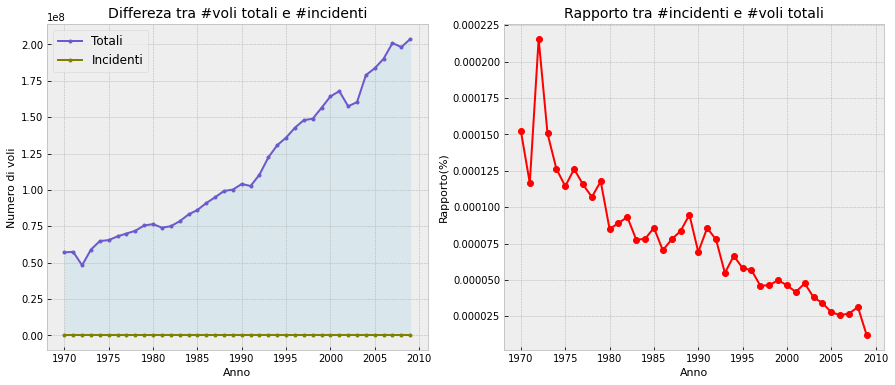

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)

plt.style.use('bmh')
plt.plot(Incidenti.index, 'Total', data=Incidenti, color='Slateblue', marker='.', linewidth=2)
plt.plot(Incidenti.index, 'Count', data=Incidenti, color='olive', marker='.', linewidth=2)
plt.fill_between(Incidenti.index, 'Total', data=Incidenti, color="skyblue", alpha=0.2)
plt.fill_between(Incidenti.index, 'Count', data=Incidenti, color="olive", alpha=0.2)
plt.legend(["Totali","Incidenti"], fontsize=12)
plt.xlabel('Anno', fontsize=11)
plt.ylabel('Numero di voli', fontsize=11)
plt.title('Differeza tra #voli totali e #incidenti', loc='Center', fontsize=14)


plt.subplot(1, 2, 2)
plt.plot(Incidenti.index, 'Ratio', data=Incidenti, color='red', marker='o', linewidth=2)
plt.xlabel('Anno', fontsize=11)
plt.ylabel('Rapporto(%)', fontsize=11)
plt.title('Rapporto tra #incidenti e #voli totali', loc='Center', fontsize=14)

plt.show()

Dai grafici si evince che il numero dei voli è in continua crescita con un numero di incidenti relativamente basso rispetto al numero di voli effettuati nei diversi anni; in aggiunta si può osservare dal grafico di destra, che la proporzione tra il numero di incidenti e il numero totale dei voli è in netto calo fino quasi ad azzerarsi nel `2010`.

In [ ]:
Totals = Passengers.copy();
Totals = Totals.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis = 1)
Totals = Totals.replace(np.nan, 0)
Totals = pd.DataFrame(Totals.sum())
Totals = Totals.drop(Totals.index[0:10])
Totals = Totals['1970':'2008']
Totals.columns = ['Sum']
Totals.index.name = 'Year'

Totals = pd.concat([Totals, Fatalities], axis=1)
Totals['Ratio'] = Totals['Fatalities'] / Totals['Sum'] * 100


Per capire al meglio la mortalità dell'aereo, andiamo a disegnare il grafico del rapporto tra i morti e il numero di passeggeri totali.

In [ ]:
plt.figure(figsize=(15,10))

plt.style.use('bmh')
plt.plot(Totals.index, "Ratio", data=Totals, color="blue", marker="o", linewidth=2)
plt.xlabel('Anno', fontsize=15)
plt.ylabel('Rapporto(%)', fontsize=15)
plt.title('Rapporto tra #morti e #passeggeri totali', loc='Center', fontsize=17)
plt.xticks(rotation=45)
plt.show()

Come si può osservare dal grafico, il rapporto è notevolmente in decrescita sin dai primi anni, fino ad arrivare ai giorni d'oggi che è vicino allo `0%` di mortalità nel trasporto aereo.<br>
Anche se ovviamente i dati non saranno precisi, questa rimane comunque una stima per dimostrare che l'utilizzo dell'aereo ai tempi d'oggi è notevolmente cambiato sia in termini di utilizzo che in termini di sicurezza rispetto a `30/40 anni` fa.